In [38]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for time series RNN LSTM neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

#import timeseries generator
# The TimeseriesGenerator is now located in tensorflow.keras.preprocessing.sequence
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [40]:
#import files
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('Database.csv')

# Display the DataFrame
data.head(5)

Saving Database.csv to Database (2).csv


,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


In [41]:
#find shape
data.shape

(315648, 13)

In [42]:
#datatypes
data.dtypes

,0
Unnamed: 0,int64
Time,object
Season,int64
Day_of_the_week,int64
DHI,float64
DNI,float64
GHI,float64
Wind_speed,float64
Humidity,float64
Temperature,float64


In [43]:
#descriptive stattistics
data.describe()

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
count,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000
mean,157823.500000,2.508212,2.998175,53.779907,288.058615,221.787985,2.545759,51.261462,17.472179,3555.139722,2019.642526,24833.695287
std,91119.873222,1.117189,1.997720,68.829995,336.057040,296.632914,1.042771,16.319826,7.701694,4371.602324,1300.285246,4859.658254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.660000,11.572000,-0.540000,-145.000000,-2476.000000,14662.000000
25%,78911.750000,2.000000,1.000000,0.000000,0.000000,0.000000,1.760000,38.380000,11.200000,-34.000000,866.000000,21368.000000
50%,157823.500000,3.000000,3.000000,7.600000,38.000000,10.200000,2.340000,51.662000,16.700000,110.000000,1829.000000,23879.000000
75%,236735.250000,4.000000,5.000000,98.800000,601.600000,427.200000,3.160000,63.644000,22.800000,7952.000000,3053.000000,26814.000000
max,315647.000000,4.000000,6.000000,431.000000,999.800000,1058.200000,8.540000,88.688000,39.020000,13191.000000,5743.000000,47067.000000


In [44]:
data.columns

Index(['Unnamed: 0', 'Time', 'Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI',
       'Wind_speed', 'Humidity', 'Temperature', 'PV_production',
       'Wind_production', 'Electric_demand'],
      dtype='object')

In [45]:
#keep only closing price
df= data.iloc[:,12:13]
df.head(5)

,Electric_demand
0,22216
1,22106
2,22130
3,22040
4,21963


In [52]:
# Select the first 500 rows
data = df.iloc[:1000]
data.shape

(1000, 1)

<Axes: >

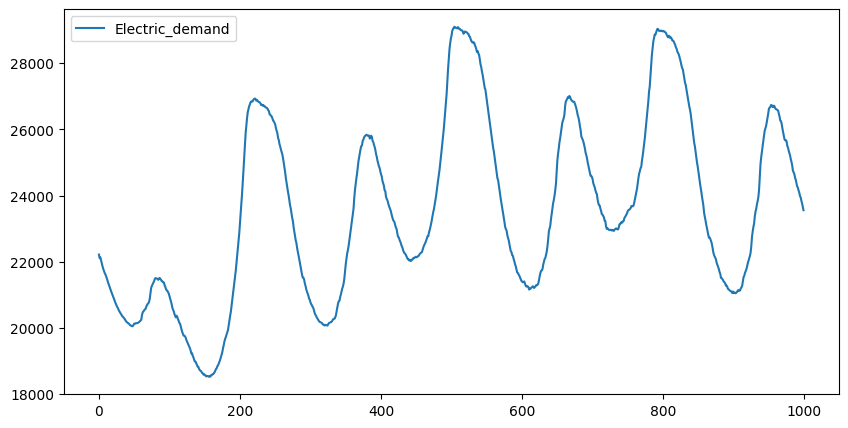

In [73]:
data.plot(figsize=(10,5))

In [69]:
#length of input time series sequence
length50=50

#length of dataframe
len(data)

1000

In [58]:
#set percentage for testing
test_per=0.15

In [64]:
#number of data points reserved for testing the model
len(data) * test_per

#test length
test_len=int(len(data) * test_per)
test_len

150

In [66]:
from re import split
#split data--> train/set
#to know the start of testing data points
split_index=int(len(data)-test_len)
split_index

850

In [71]:
#create testing and trainning dataset
data_train=data[:split_index]

data_test=data[split_index-length50:]

In [72]:
#train datset
data_train.head()


,Electric_demand
0,22216
1,22106
2,22130
3,22040
4,21963


In [74]:
 #last five of test data
data_test.tail()

,Electric_demand
995,23942
996,23842
997,23760
998,23663
999,23557


In [76]:
#normalize the data
#create a minmaxscaler  to normalize
scaler=MinMaxScaler()

#train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [77]:
#nomralize the trainning dataset
normalized_train_data=scaler.transform(data_train)

#normalize the test dataset
normalized_test_data=scaler.transform(data_test)

In [78]:
#create timeseries generator for training
batch_size32=32

#create timeseriesgenerator for training: train_tsgenerator
train_tsGenerator=TimeseriesGenerator(normalized_train_data,normalized_train_data,length=length60,batch_size=batch_size32)

In [79]:
len(normalized_train_data )

850

In [80]:
len(train_tsGenerator)

25

In [81]:
#lets observe first batch of dataset
X,y=train_tsGenerator[0]

In [82]:
print(X)

[[[0.34918684]
  [0.33878593]
  [0.34105522]
  ...
  [0.14438351]
  [0.14485628]
  [0.14854387]]

 [[0.33878593]
  [0.34105522]
  [0.33254539]
  ...
  [0.14485628]
  [0.14854387]
  [0.15156959]]

 [[0.34105522]
  [0.33254539]
  [0.32526475]
  ...
  [0.14854387]
  [0.15156959]
  [0.15147504]]

 ...

 [[0.18674357]
  [0.18371785]
  [0.17965204]
  ...
  [0.26418306]
  [0.26834342]
  [0.27212557]]

 [[0.18371785]
  [0.17965204]
  [0.1772882 ]
  ...
  [0.26834342]
  [0.27212557]
  [0.27836611]]

 [[0.17965204]
  [0.1772882 ]
  [0.17293873]
  ...
  [0.27212557]
  [0.27836611]
  [0.28177005]]]


In [83]:
print(y)

[[0.15156959]
 [0.15147504]
 [0.153177  ]
 [0.15289334]
 [0.153177  ]
 [0.15374433]
 [0.15506808]
 [0.15658094]
 [0.1582829 ]
 [0.16036309]
 [0.16310514]
 [0.17577534]
 [0.18381241]
 [0.18664902]
 [0.18901286]
 [0.19222769]
 [0.19374054]
 [0.19941377]
 [0.20461422]
 [0.20820726]
 [0.20943646]
 [0.21397504]
 [0.22229576]
 [0.23893722]
 [0.25368759]
 [0.25945537]
 [0.26418306]
 [0.26834342]
 [0.27212557]
 [0.27836611]
 [0.28177005]
 [0.28129728]]


In [84]:
###build, test, train LSTM Model


In [85]:
#set number of features
n_features=1

In [86]:
#define model
model=Sequential()

#add lstm Layer with 50 LSTM cells, activation function relu
model.add(LSTM(50,activation='relu',return_sequences= True, input_shape=(length60,n_features)))

#add dropout layer
model.add(Dropout(0.2))

#add 2nd LSTM layer
model.add(LSTM(50,activation='relu',return_sequences= True))

#add droupout layer
model.add(Dropout(0.2))

#add 3rd LSTM layer
model.add(LSTM(50,activation='relu'))

#add dense layer
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
### compile model

In [88]:
#complie model
model.compile(optimizer='adam',loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
#train the model
model.fit(train_tsGenerator,epochs=100)

Epoch 1/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2:15 6s/step - loss: 0.4554

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.2330
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0266
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0324
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0208
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0262
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0208
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0139
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0128
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0119
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0076
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0040
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0074
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0158
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0067
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.00

In [ ]:
##visaulize model performance

loss_history_keys=model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

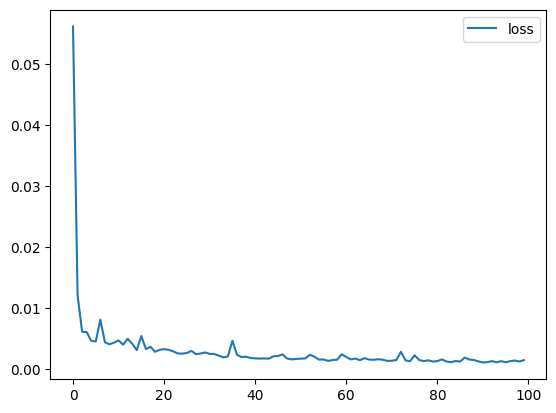

In [ ]:
#load the loss data(model.history.history) into data frame
df_model_loss=pd.DataFrame(model.history.history)
df_model_loss.plot()

In [90]:
#prediction for testing using timeseries generator
#batch_size must be 1
batch_size=1

#create a timeseriesgenerator for testing
test_tsGenerator=TimeseriesGenerator(normalized_test_data,normalized_test_data,length=length60,batch_size=batch_size)

In [91]:
#predict future data for testing
normalized_prediction= model.predict(test_tsGenerator)

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [92]:
#prediction
normalized_prediction

array([[0.57943374],
       [0.5653233 ],
       [0.55135316],
       [0.5375832 ],
       [0.52406746],
       [0.5109535 ],
       [0.49819252],
       [0.4858064 ],
       [0.47376174],
       [0.4618212 ],
       [0.449916  ],
       [0.43807048],
       [0.42634484],
       [0.4148471 ],
       [0.40364125],
       [0.3928377 ],
       [0.38254175],
       [0.37314144],
       [0.36491206],
       [0.35796067],
       [0.352263  ],
       [0.34762016],
       [0.34361845],
       [0.3399057 ],
       [0.3362923 ],
       [0.33276895],
       [0.32923913],
       [0.3255321 ],
       [0.32153845],
       [0.31720063],
       [0.31248003],
       [0.3073701 ],
       [0.3019531 ],
       [0.29613546],
       [0.29007107],
       [0.2839779 ],
       [0.27804706],
       [0.27241692],
       [0.2672372 ],
       [0.26259357],
       [0.25841305],
       [0.2548112 ],
       [0.25173026],
       [0.24907753],
       [0.24682473],
       [0.24492115],
       [0.24335462],
       [0.242

In [93]:
len(normalized_prediction)

150

In [94]:
#convert to true value from normalized value
prediction=scaler.inverse_transform(normalized_prediction)


In [96]:
#flatten all the 2Darray

prediction_index=np.arange(850,1000,step=1)

df_prediction=pd.DataFrame(prediction,index=prediction_index,columns=['prediction'])

In [97]:
df_prediction.head()

,prediction
850,24651.091797
851,24501.859375
852,24354.111328
853,24208.480469
854,24065.537109


<Axes: >

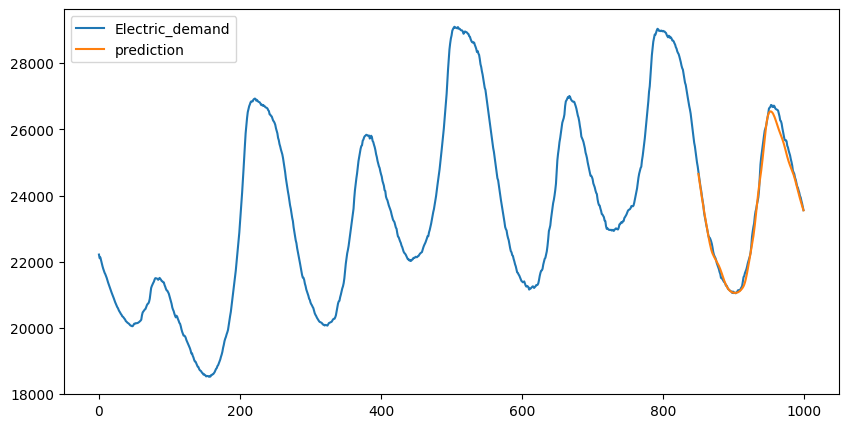

In [99]:
#visualize prediction

ax=data.plot(figsize=(10,5))

df_prediction.plot(ax=ax,figsize=(10,5))

In [101]:
#time series forecasting with LSTM

#preprocees full inout datset
full_scaler=MinMaxScaler()
normalized_full_data=full_scaler.fit_transform(data)

In [103]:
#cerate time series genertor for forecating
#use length50

forecast_tsGenerator=TimeseriesGenerator(normalized_full_data,normalized_full_data,length=length50,batch_size=batch_size)
#forecast_tsGenerator=TimeseriersGenerator(normalized_full_data,normalized_full_data,length=length60,batch_size=batc)_size32)

In [105]:
#build,compile adn fit model for forecasting
model.fit(forecast_tsGenerator,epochs=10)

Epoch 1/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - loss: 0.0017
Epoch 2/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 0.0025
Epoch 3/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - loss: 0.0015
Epoch 4/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - loss: 0.0018
Epoch 5/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - loss: 0.0014
Epoch 6/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 0.0012
Epoch 7/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - loss: 0.0013
Epoch 8/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 0.0010
Epoch 9/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - loss: 9.8753e-04
Epoch 10/10
950/950 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - loss: 8.9675e-04


In [106]:
# time series forcast using LSTM neural network

forecast=[]

#set period with the time span of forecasting
periods =107

first_eval_batch=normalized_full_data[-length50:]
current_batch=first_eval_batch.reshape((1,length50,n_features))

for i in range(periods):
  #get prediction 1 time stamp ahed
  current_pred=model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include and drop the first value
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

In [107]:
#inverse to transform normalized data back into true values
forecast=full_scaler.inverse_transform(forecast)
forecast

array([[23409.35009909],
       [23326.35475159],
       [23231.95207071],
       [23130.35676861],
       [23024.76581097],
       [22917.97713375],
       [22804.1915679 ],
       [22687.20998192],
       [22571.2161994 ],
       [22458.73425674],
       [22350.30974674],
       [22247.30901527],
       [22150.16986036],
       [22058.08256054],
       [21970.00257826],
       [21886.49662399],
       [21808.71703005],
       [21738.46163654],
       [21676.39234114],
       [21622.08363819],
       [21575.75899696],
       [21536.67110348],
       [21504.86975765],
       [21479.79518318],
       [21460.23327065],
       [21444.31368637],
       [21432.07110119],
       [21423.67193508],
       [21417.28619862],
       [21414.47439432],
       [21416.63974524],
       [21425.29516029],
       [21441.8388195 ],
       [21463.3069973 ],
       [21488.63813591],
       [21516.69377136],
       [21547.9731636 ],
       [21582.10060692],
       [21619.19272137],
       [21656.96186256],


In [115]:
data


,Electric_demand
0,22216
1,22106
2,22130
3,22040
4,21963
...,...
995,23942
996,23842
997,23760
998,23663


In [116]:
#create new timestamp index with pandas

#calculate forecast index
forecast_index=np.arange(1000,1000+periods,step=1)
forecast_index

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106])

In [117]:
forecast_df=pd.DataFrame(forecast,index=forecast_index,columns=['forecast'])
forecast_df

,forecast
1000,23409.350099
1001,23326.354752
1002,23231.952071
1003,23130.356769
1004,23024.765811
...,...
1102,21967.111977
1103,21983.507497
1104,21997.746491
1105,22009.704145


<Axes: >

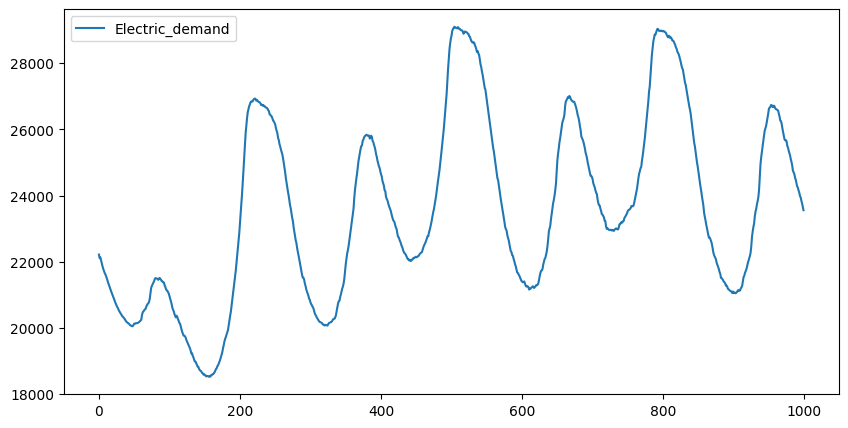

In [119]:
#plot the forecast
data.plot(figsize=(10,5))
forecast_df.plot(ax=ax,figsize=(10,5))

<Axes: >

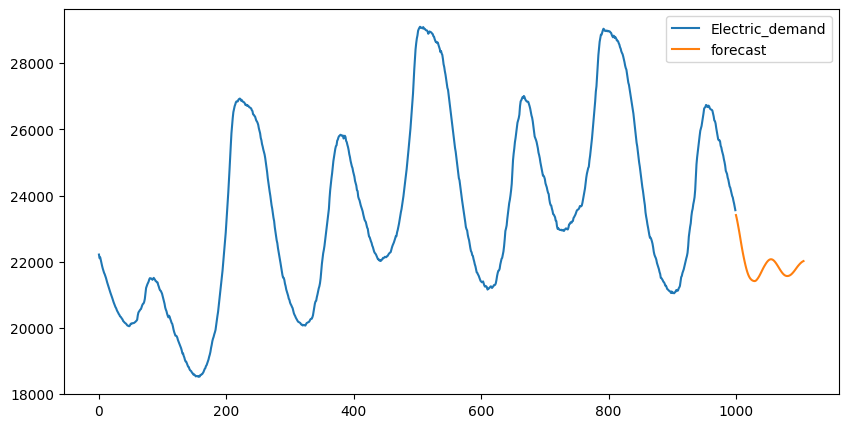

In [120]:
#joining pandas plot
ax=data.plot(figsize=(10,5))
forecast_df.plot(ax=ax,figsize=(10,5))